In [1]:
#Importing packages
import cobra
import cplex
from cobra import Model, Reaction, Metabolite
from cobra.io import read_sbml_model
import pandas as pd

In [2]:
#Importing model iYali
yali = cobra.io.read_sbml_model('iYali-tidy v.6.xml')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [23]:
def heatmap_flux(minimal_flux=0.05,save=False,**kwargs):

	list_df=list()
	for solution in kwargs["solutions"] :
		series=solution.fluxes[solution.fluxes!=0] #remove 0 values
		df=series.to_frame()
		df["name"]=df.index
		df = df.drop(df[df.fluxes < minimal_flux].index) #enlève les flux avec une valeur inférieur a minimal_flux
		list_df.append(df)
	#Quadraboucle qui s'assure que chaque DF contient les mêmes labels (que toutes les réactions soient présente dans chaque DF)
	#si ce n'est pas le cas rajoute une ligne avec pour valeur 0 dans les dataframe qui n'ont pas le label (Nom de réaction)
	for df in list_df :
		for i in df.index :
			for df2 in list_df :
				if i not in df2.index :
					df2.loc[i]=[0,i]
	# combine tous les DF dans un seul DF nommé results
	results=pd.DataFrame()
	compteur=0
	for name in kwargs["name_columns"] :
		results[name]=list_df[compteur]["fluxes"]
		compteur+=1

	#plot 
	fig, ax = plt.subplots(figsize=(20,50))
	ax=sns.heatmap(results)
	#savefig
	if save==True :
		fig = ax.get_figure()
		fig.savefig(kwargs["name_plot"]) 
	return results

In [24]:
yali.objective = 'y300099'

In [25]:
solution = yali.optimize()
print(solution)
solution.objective_value

<Solution 0.158 at 0x2412523d760>


0.15789473684210525

In [26]:
solutions = yali.optimize()

,flux1
y000074,0.366316
y000082,0.366316
y000091,1.073684
y000112,0.157895
y000113,1.042105
y000149,1.042105
y000173,0.157895
y000226,0.808421
y000300,0.221053
y000303,0.221053


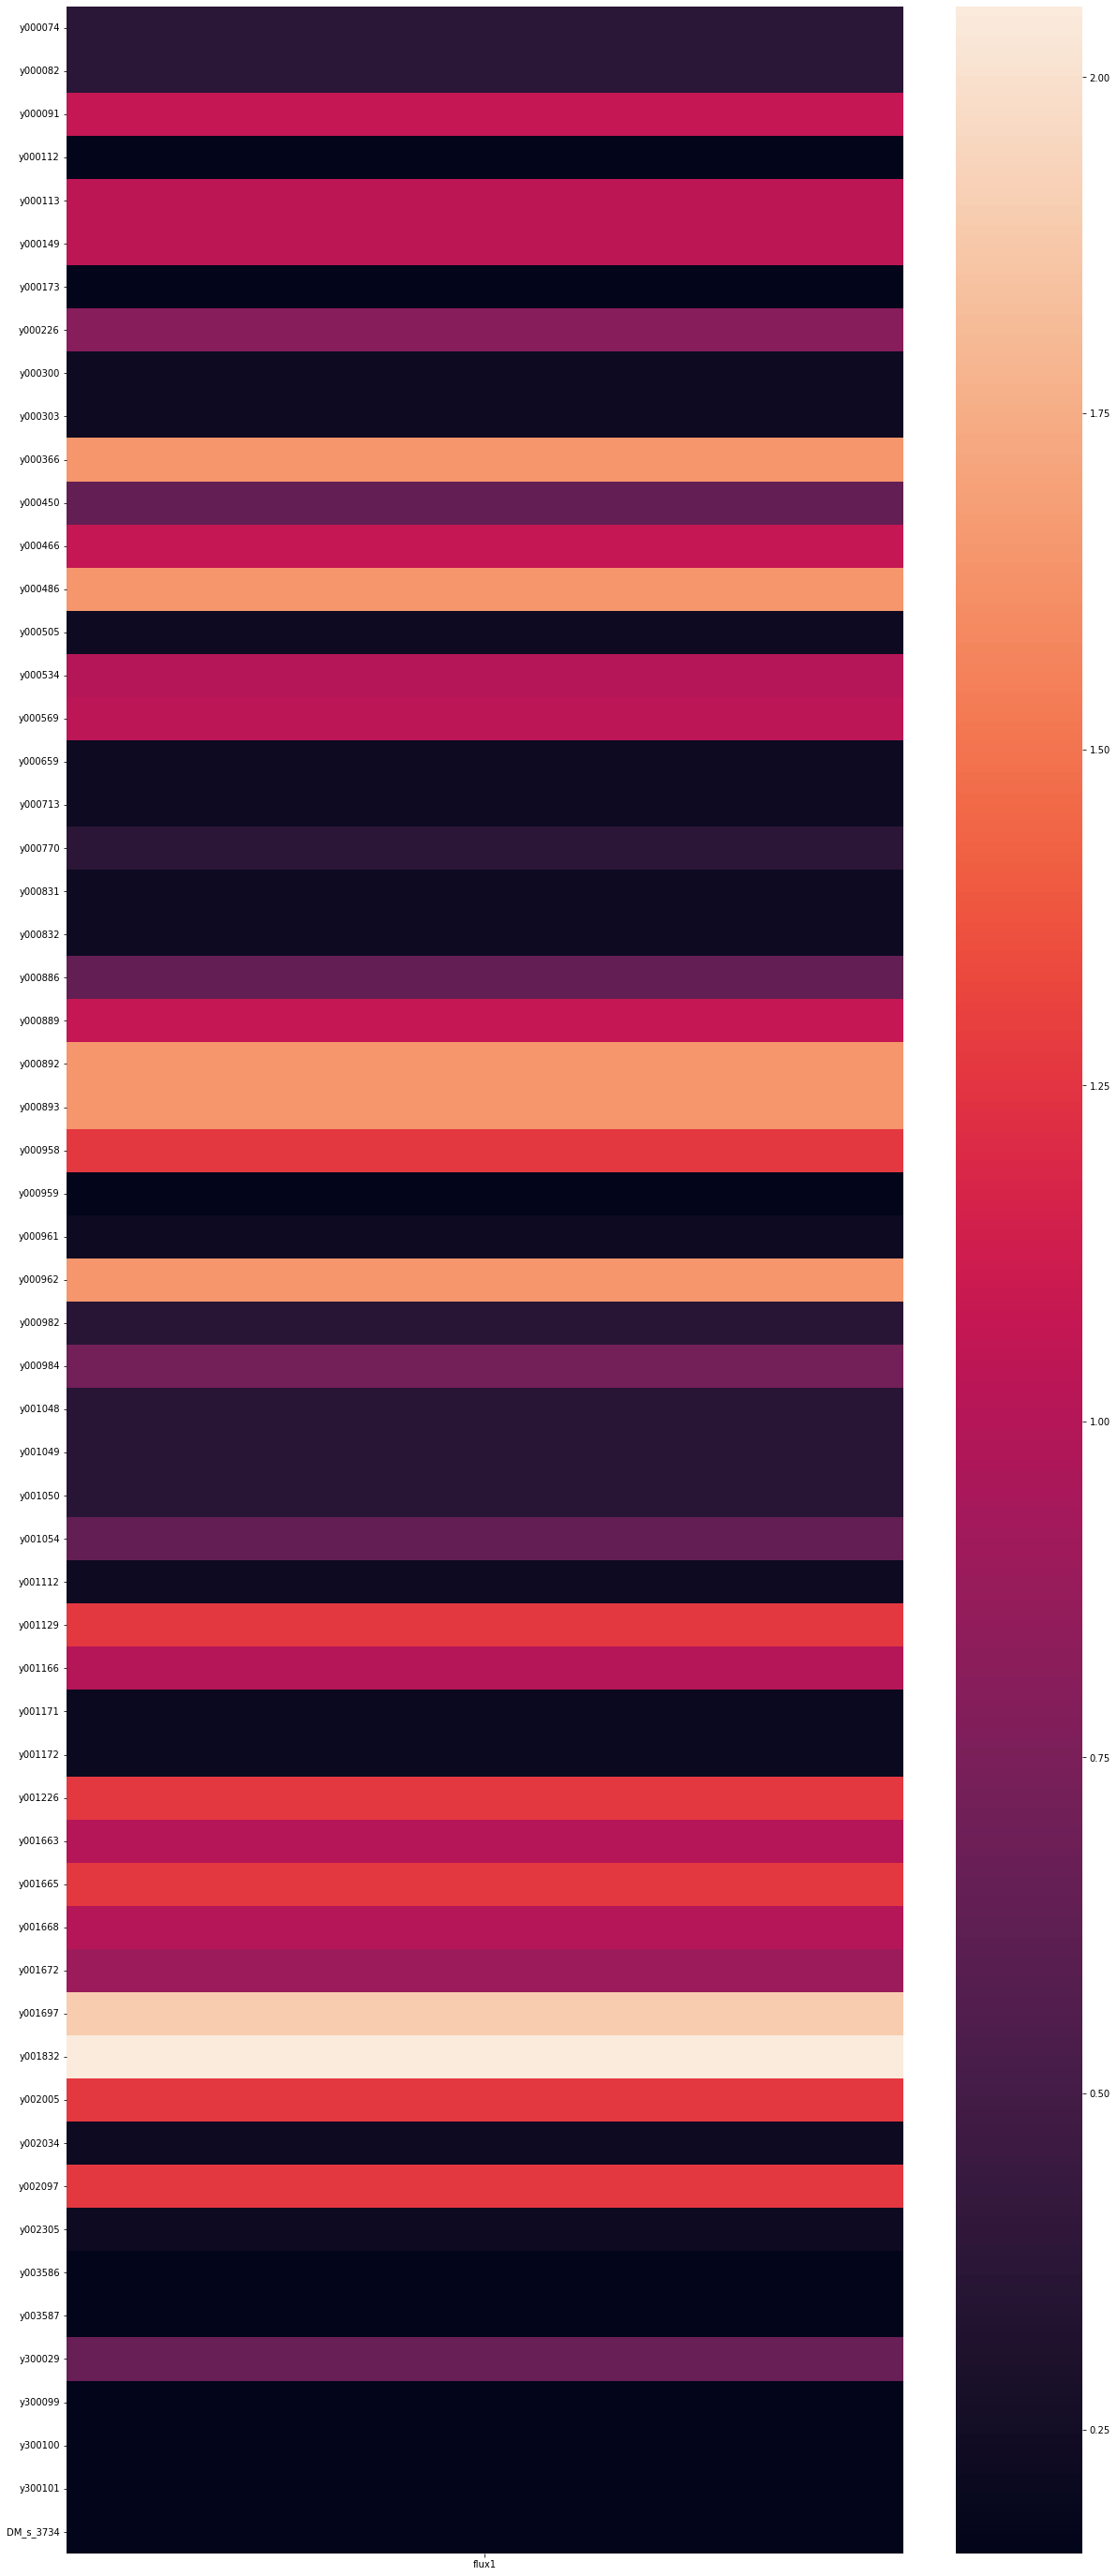

In [29]:
heatmap_flux(solutions = [solutions],name_columns = ["flux1"
                                                    
                                                    ])

In [21]:
solutions.fluxes

xAMINOACID      0.000000
xBIOMASS        0.000000
xLIPID          0.000000
xMAINTENANCE    0.000000
xPOOL_AC_EM     0.000000
                  ...   
y300106        -0.157895
y300107         0.000000
y300108         0.000000
DM_s_3734       0.157895
DM_s_3736       0.000000
Name: fluxes, Length: 1953, dtype: float64

In [34]:
def heatmap_flux2(minimal_flux=0.05,save=False,**kwargs):
    list_df=list()
    for solution in kwargs["solutions"] :
        series=solution.fluxes[solution.fluxes!=0] #remove 0 values
        #for react in series.keys():
            #if ('EX' in react) or ('VATPASE' in react) or ('VCK' in react) or ('VLEAK' in react):
                #series.pop(react)
        df=series.to_frame()
        df["name"]=df.index
        df = df.drop(df[df.fluxes < minimal_flux].index) #enlève les flux avec une valeur inférieur a minimal_flux
        list_df.append(df)
    #Quadraboucle qui s'assure que chaque DF contient les mêmes labels (que toutes les réactions soient présente dans chaque DF)
    #si ce n'est pas le cas rajoute une ligne avec pour valeur 0 dans les dataframe qui n'ont pas le label (Nom de réaction)
    for df in list_df :
        for i in df.index :
            for df2 in list_df :
                if i not in df2.index :
                    df2.loc[i]=[0,i]
    # combine tous les DF dans un seul DF nommé results
    results=pd.DataFrame()
    results_prov=pd.DataFrame()
    compteur=0
    for name in kwargs["name_columns"] :
        results[name]=list_df[compteur]["fluxes"]
        compteur+=1
    '''for react in l_react:
        line = results.loc[react,:]
        results_prov = results_prov.append(line, ignore_index = True)
    results = results_prov'''
    #plot
    grid_kws = {"height_ratios": (.7, .3), "hspace": .1}
    fig, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(10,20))
    ax=sns.heatmap(results, ax=ax, cbar_kws={"orientation": "vertical"}, cmap="YlGnBu")
    #savefig
    if save==True :
        fig = ax.get_figure()
        fig.savefig(kwargs["name_plot"])
    return results

,flux1
y000074,0.366316
y000082,0.366316
y000091,1.073684
y000112,0.157895
y000113,1.042105
y000149,1.042105
y000173,0.157895
y000226,0.808421
y000300,0.221053
y000303,0.221053


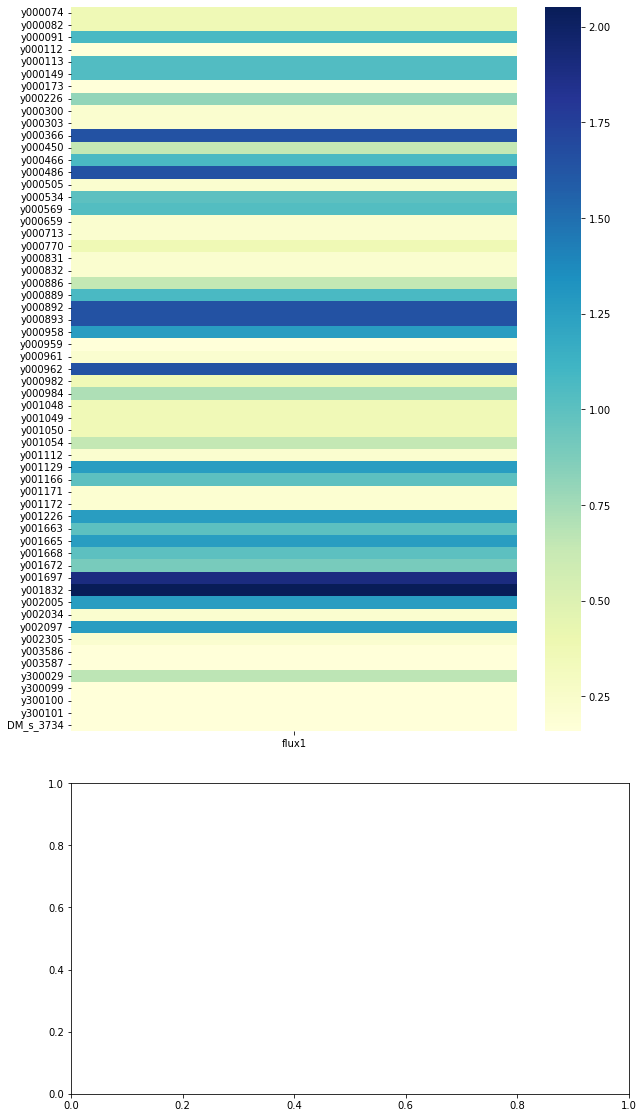

In [35]:
heatmap_flux2(solutions = [solutions],name_columns = ["flux1"])